<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
    Midterm Seminar
</div>

# Preprocess

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load data and take a quick look

In [2]:
# code here
raw_df = pd.read_csv('Data/HR-Employee-Attrition.csv')

Kích thước của dữ liệu

In [3]:
raw_df.shape

(1470, 35)

In [4]:
raw_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Giải thích ý nghĩa của các cột

- **Age**: Tuổi nhân viên
- **Attrition**: Hao mòn nhân lực hay không
- **BusinessTravel**: Mức độ thường xuyên đi công tác của nhân viên
- **DailyRate**: Thù lao / ngày 
- **Department**: Phòng ban mà nhân viên thuộc
- **DistanceFromHome**: Khoảng cách từ nhà đến nơi làm việc
- **Education**: Mức độ học vấn
- **EducationField**: Chuyên ngành học
- **EmployeeCount**: Số lượng nhân viên trong bảng lương (?)
- **EmployeeNumber**: Số định danh của nhân viên
- **EnvironmentSatisfaction**: Mức độ hài lòng về môi trường làm việc
- **Gender**: Giới tính
- **HourlyRate**: Thù lao / giờ
- **JobInvolvement**: Mức độ hứng thứ với công việc
- **JobLevel**: Cấp bậc công việc
- **JobRole**: Vai trò công việc
- **JobSatisfaction**: Mức độ hài lòng về công việc
- **MaritalStatus**: Trạng thái hôn nhân
- **MonthlyIncome**: Thu nhập hàng tháng
- **MonthlyRate**: Thù lao / tháng
- **NumCompaniesWorked**: Số lượng công ty đã từng làm việc
- **Over18**: Nhân viên trên 18 tuổi hay không
- **OverTime**: Nhân viên làm thêm giờ hay không
- **PercentSalaryHike**: Tỷ lệ tăng lương theo %
- **PerformanceRating**: Hiệu suất công việc
- **RelationshipSatisfaction**: Mức độ hài lòng về các mối quan hệ
- **StandardHours**: Số giờ làm việc tiêu chuẩn / tuần
- **StockOptionLevel**: Mức độ tuỳ chọn cổ phiếu 
- **TotalWorkingYears**: Tổng số năm làm việc
- **TrainingTimesLastYear**: Số lần tham gia đào tạo / huấn luyện trong năm trước
- **WorkLifeBalance**: Mức độ cân bằng cuộc sống với công việc
- **YearsAtCompany**: Số năm làm việc ở công ty
- **YearsInCurrentRole**: Số năm làm việc ở vai trò hiện tại
- **YearsSinceLastPromotion**: Số năm kể từ lần thăng chức gần nhất
- **YearsWithCurrManager**: Số năm làm việc với quản lý hiện tại

## 2. Value distribution and handle missing value

### 2.1 Kiếm tra dữ liệu trùng lặp

In [5]:
duplicate_rows = raw_df[raw_df.duplicated()]
# print duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


=> Không có dữ liệu nào bị trùng lặp

### 2.2  Xử lý missing value

- Tính toán kiểu dữ liệu của từng cột

In [6]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df = raw_df.copy()


In [8]:
# Tính tỷ lệ giá trị bị thiếu cho mỗi cột
missing_ratio = df.isnull().mean() * 100

# Lọc ra các cột có tỷ lệ giá trị bị thiếu lớn hơn 60%
missing_column = missing_ratio[missing_ratio > 0]

# In ra tên cột và tỷ lệ giá trị bị thiếu tương ứng
for column_name, missing_percent in missing_column.items():
    print(f"'{column_name}': {missing_percent}%")


Loại bỏ các cột có tỉ lệ missing value > 60%

In [9]:
missing_column = missing_column.index
df = df.drop(missing_column, axis = 1)

### 2.3 Xử lí giá trị các cột Yes No , Gender

In [10]:
YesNo_col = ["Attrition","Over18","OverTime","Gender"]

value_mapping = {"Yes": 1, "No": 0, "Y": 1, "N": 0,"Female": 0 ,"Male": 1 }

for col in YesNo_col :
    df[col] = df[col].map(value_mapping)

In [11]:
df[YesNo_col].head(5)

,Attrition,Over18,OverTime
0,1,1,1
1,0,1,0
2,1,1,1
3,0,1,1
4,0,1,0


## 3. Outlier detection and Treatment

First, select numerical columns

In [12]:
numerical_cols = df.select_dtypes(include=["int64","float"])
numerical_cols = numerical_cols.drop(columns=YesNo_col, errors='ignore')
numerical_cols

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


Select columns that have outliers

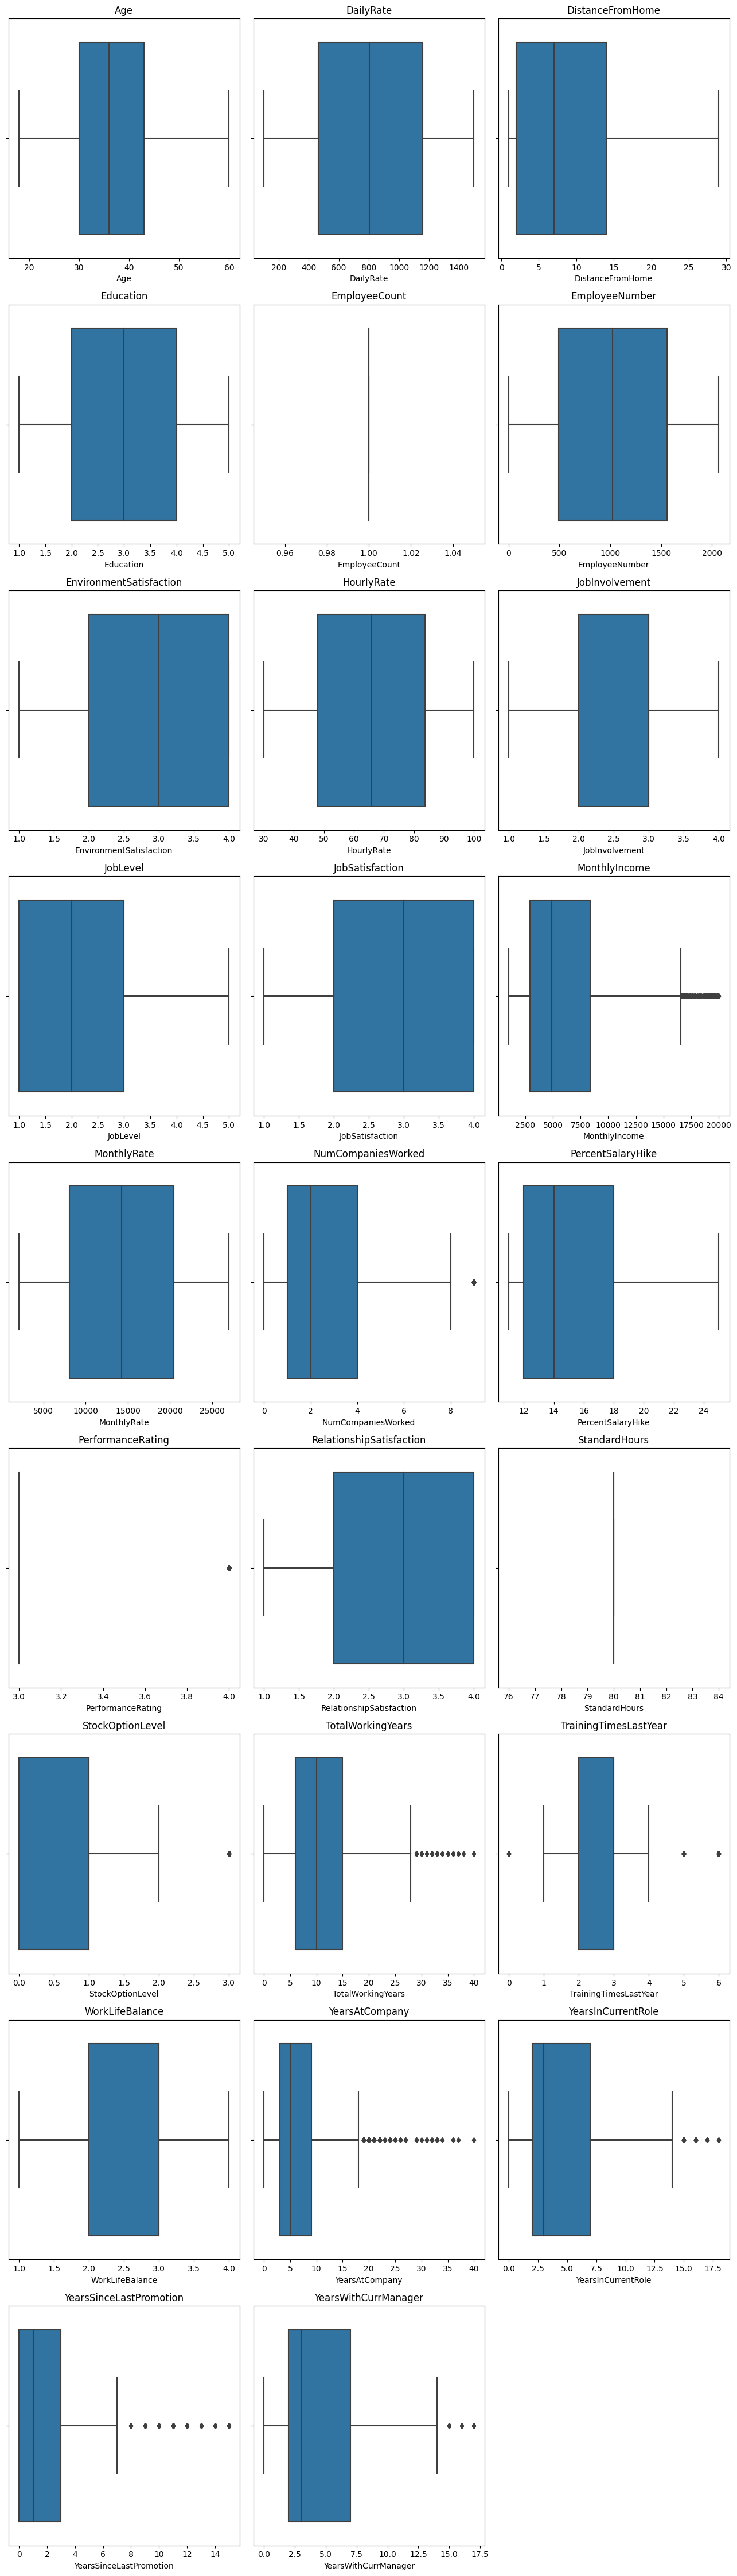

In [16]:
import seaborn as sns 
num_cols = 3
num_rows = (len(numerical_cols.columns) - 1) // num_cols + 1

# Create a figure and axes with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 5*num_rows))

# Flatten the axes array if it's more than 1D
axes = axes.flatten()

# Iterate over numerical columns and create boxplots
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(x=numerical_cols[col], ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots
for j in range(len(numerical_cols.columns), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Handle categorical column (No need)

BusinessTravel : ordinal encoding


In [20]:
# df["Department"].unique()
# df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)